
## Лабораторная работа №2

### Цель работы  
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.




### Данные для работы
1) Средствами ОС Windows записать свой речевой сигнал.  
2) Фраза — Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных технологий и информатики.  
3) Формат записи — моно-сигнал, $16000$ гц или $22000$ гц, без сжатия (wav-формат). 

### Задачи лабораторной работы
1) Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.  
2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса  
3) Построить сонограмму по записи своего голоса.


Загрузим используемые библиотеки,проверим что файл со звуком работает и считаем его. Построим по считаному голосу аудио график.

In [52]:
from scipy.io import  wavfile
from scipy import signal
import scipy.io

import numpy as np
import IPython.display as ipd

def showPlot():
    plt.xlabel("Time [sec]")
    plt.ylabel("Amplitude")
    plt.show()

ipd.Audio('./solid.wav')

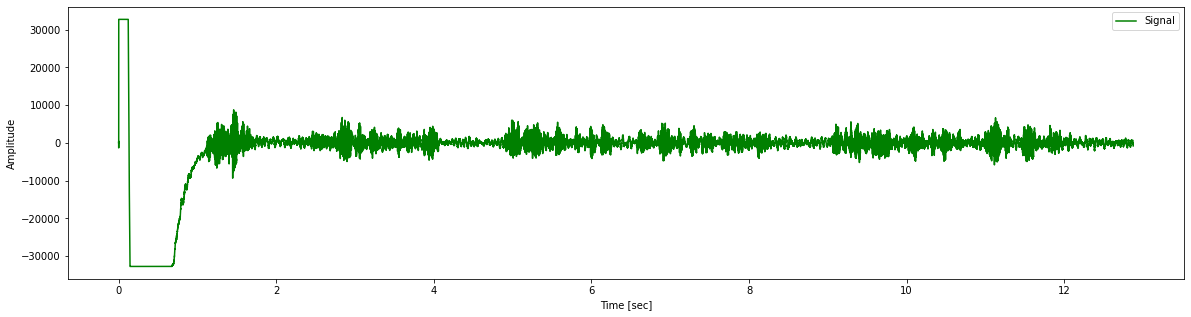

In [53]:
import matplotlib.pyplot as plt
import numpy as np

frequency, x = wavfile.read('solid.wav') 

duratation = x.shape[0]/ frequency
time =  np.linspace(0, duratation, x.shape[0])

#Рисуем график
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(time, x, label="Signal",color="green")
plt.legend()
showPlot()




### Построение траектории основного тона


Частотой основного тона (F0) называют частоту вибрации голосовых связок.  
У каждого говорящего базовая частота основного тона индивидуальна и обусловлена особенностями строения гортани.  
Частота основного тона различна для мужских (примерный диапазон:
80− 200 Hz) и женских (примерный диапазон: 160− 350 Hz) голосов.



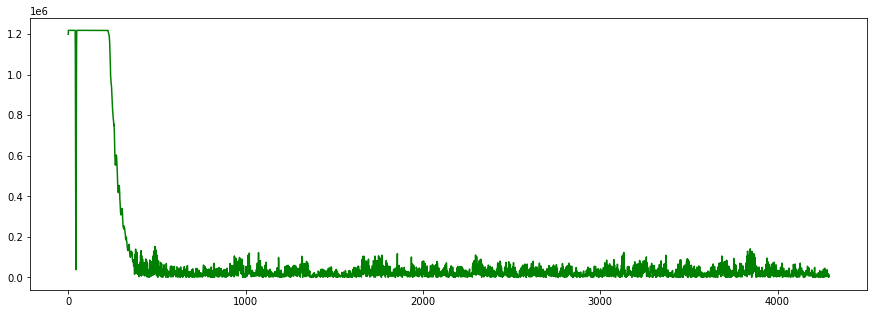

In [54]:
n = 64
shift = round(n*0.25)

i = 0
res = []
while i < len(x):
    res.append(x[i:i+n])
    i = i + n - shift
res = [i*np.hamming(len(i)) for i in res]

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X
res = [DFT(i) for i in res]
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in res]
amplitude_spec = np.array([i.real for i in amplitude_spec])
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(amplitude_spec, color="green")

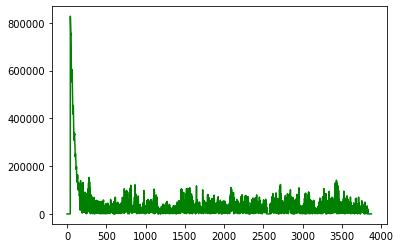

In [72]:
spec_res = round(frequency/n)
f_0 = []
chapter = []

for i in range(0, len(amplitude_spec), spec_res):
    chapter.append(amplitude_spec[i:i + spec_res])

for i in sections:
    chapter = np.array(i)
    if chapter.max() > 3*chapter.mean():            
        f_0 += chapter.tolist()
    else:
        f_0 += [0 for i in range(len(section))]
        
plt.plot(f_0,color="green")

### Построение траекторий второй, третьей и четвертой формантных частот

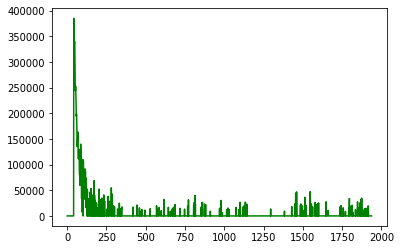

In [73]:
f_1 = []

for i in range(int(len(f_0)/2)):
    max_spec = max([F0[2*i], f_0[2*i-1], f_0[2*i+1]])
    if f_0[i] > 2*max_spec:           
        f_1 += [max_spec]
    else:
        f_1 += [0]
            
plt.plot(f_1,color="green")

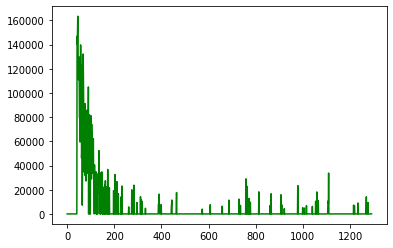

In [74]:
f_2 = []

for i in range(int(len(f_0)/3)):
    max_spec = max([F0[3*i], f_0[3*i-1], f_0[3*i+1]])
    if f_0[i] > 3*max_spec:           
        f_2 += [max_spec]
    else:
        f_2 += [0]
            
plt.plot(f_2,color="green")

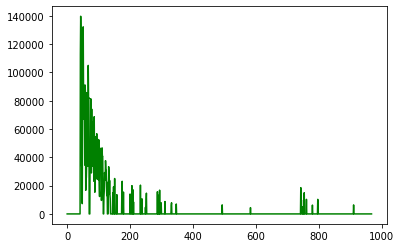

In [75]:
f_3 = []

for i in range(int(len(f_0)/4)):
    max_spec = max([F0[4*i], f_0[4*i-1], f_0[4*i+1]])
    if f_0[i] > 4*max_spec:           
        f_3 += [max_spec]
    else:
        f_3 += [0]

plt.plot(f_3,color="green")

### Построение сонограммы

/tmp/ipykernel_249478/4113646296.py:7: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x1*np.conj(x1)))


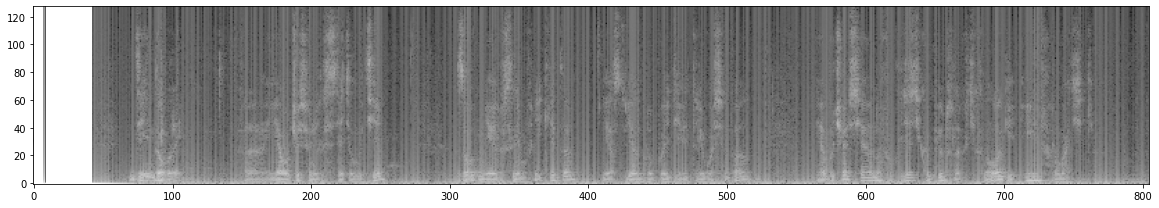

In [64]:
from scipy import fft

N = 256
S = []
for k in range(0, x.shape[0]+1, N):
    x1 = fft.fftshift(fft.fft(x[k:k+N], n=N))[N//2:N]
    Pxx = 10*np.log10(np.real(x1*np.conj(x1)))
    S.append(Pxx)
S = np.array(S)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.imshow(S.T, origin='lower',cmap='gray')